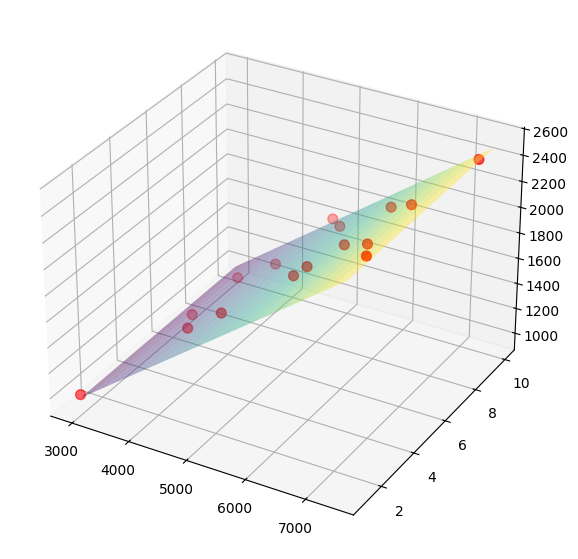

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

x1_orig=np.array([6274,6689,4276,5130,6035,2946,4727,6873,3911,5689,5459,4508,3589,7212,7454,3366])
x2_orig=np.array([8,5,8,9,6,1,10,7,4,5,5,4,8,3,9,6])
y=np.array([2100,2200,1400,1700,2000,1000,1600,2300,1300,1900,1800,1500,1200,2400,2500,1100])

a0=a1=a2=0.0

mean_x1, std_x1=np.mean(x1_orig), np.std(x1_orig)
mean_x2, std_x2=np.mean(x2_orig), np.std(x2_orig)

x1=(x1_orig-mean_x1)/std_x1    #Scale down new data w this mean and std
x2=(x2_orig-mean_x2)/std_x2


e=10**(-3)
ep=10**(-6)
while True:
    h = a0 + a1*x1 + a2*x2

    da0 = np.sum(h - y) / 16
    da1 = np.sum((h - y) * x1) / 16
    da2 = np.sum((h - y) * x2) / 16

    a0 = a0 - e * da0
    a1 = a1 - e * da1
    a2 = a2 - e * da2

    if abs(da0) < ep and abs(da1) < ep and abs(da2) < ep:
        break



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_orig, x2_orig, y, color='red', s=50)


x1_grid = np.linspace(min(x1_orig), max(x1_orig), 20)
x2_grid = np.linspace(min(x2_orig), max(x2_orig), 20)
X1, X2 = np.meshgrid(x1_grid, x2_grid)


Z = a0 + a1*((X1 - mean_x1)/std_x1) + a2*((X2 - mean_x2)/std_x2)


ax.plot_surface(X1, X2, Z, alpha=0.4, cmap='viridis')



plt.savefig('regression_img.png')
